In [3]:
%pip install pandas numpy matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Styling
plt.style.use('default')
sns.set_palette("husl")


In [5]:
# %%
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

print("California Housing Dataset – Quick EDA")
print("=" * 50)
print("Dataset shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing values:", df.isnull().sum().sum())


California Housing Dataset – Quick EDA
Dataset shape: (20640, 9)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000

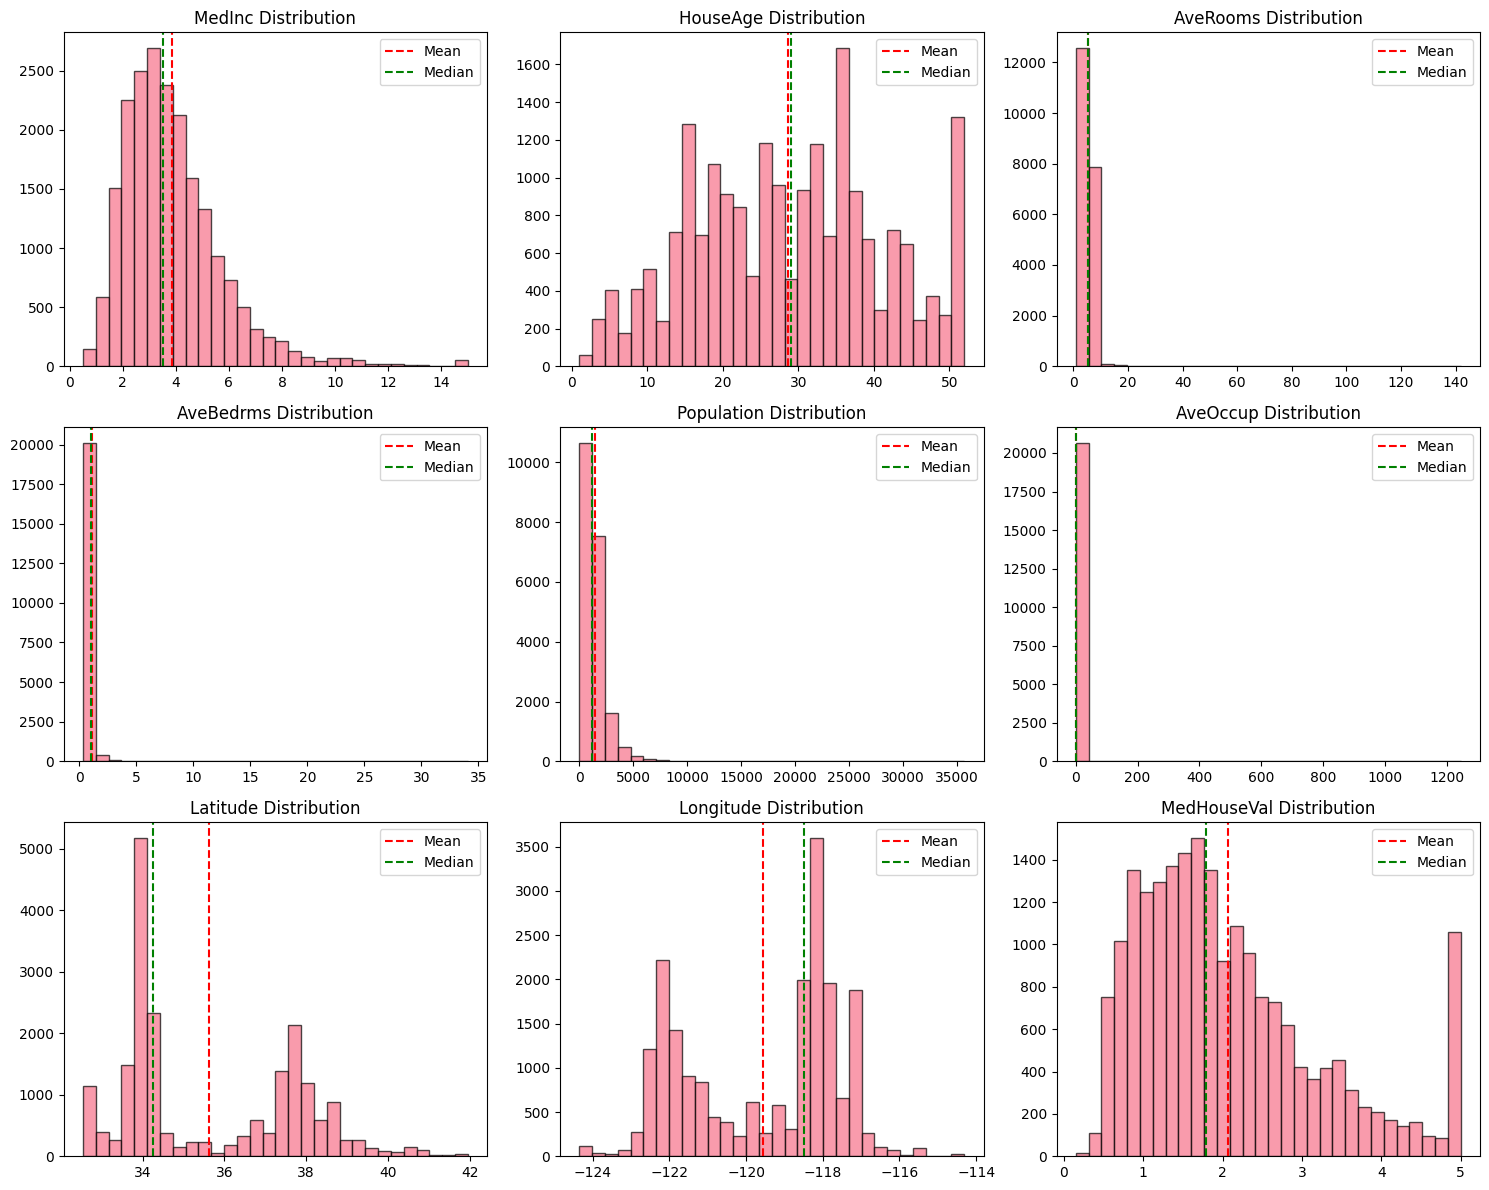

In [6]:
# %%
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, alpha=0.7, edgecolor="black")
    ax.set_title(f"{col} Distribution")

    ax.axvline(df[col].mean(), color="red", linestyle="--", label="Mean")
    ax.axvline(df[col].median(), color="green", linestyle="--", label="Median")

    ax.legend()

plt.tight_layout()
plt.show()


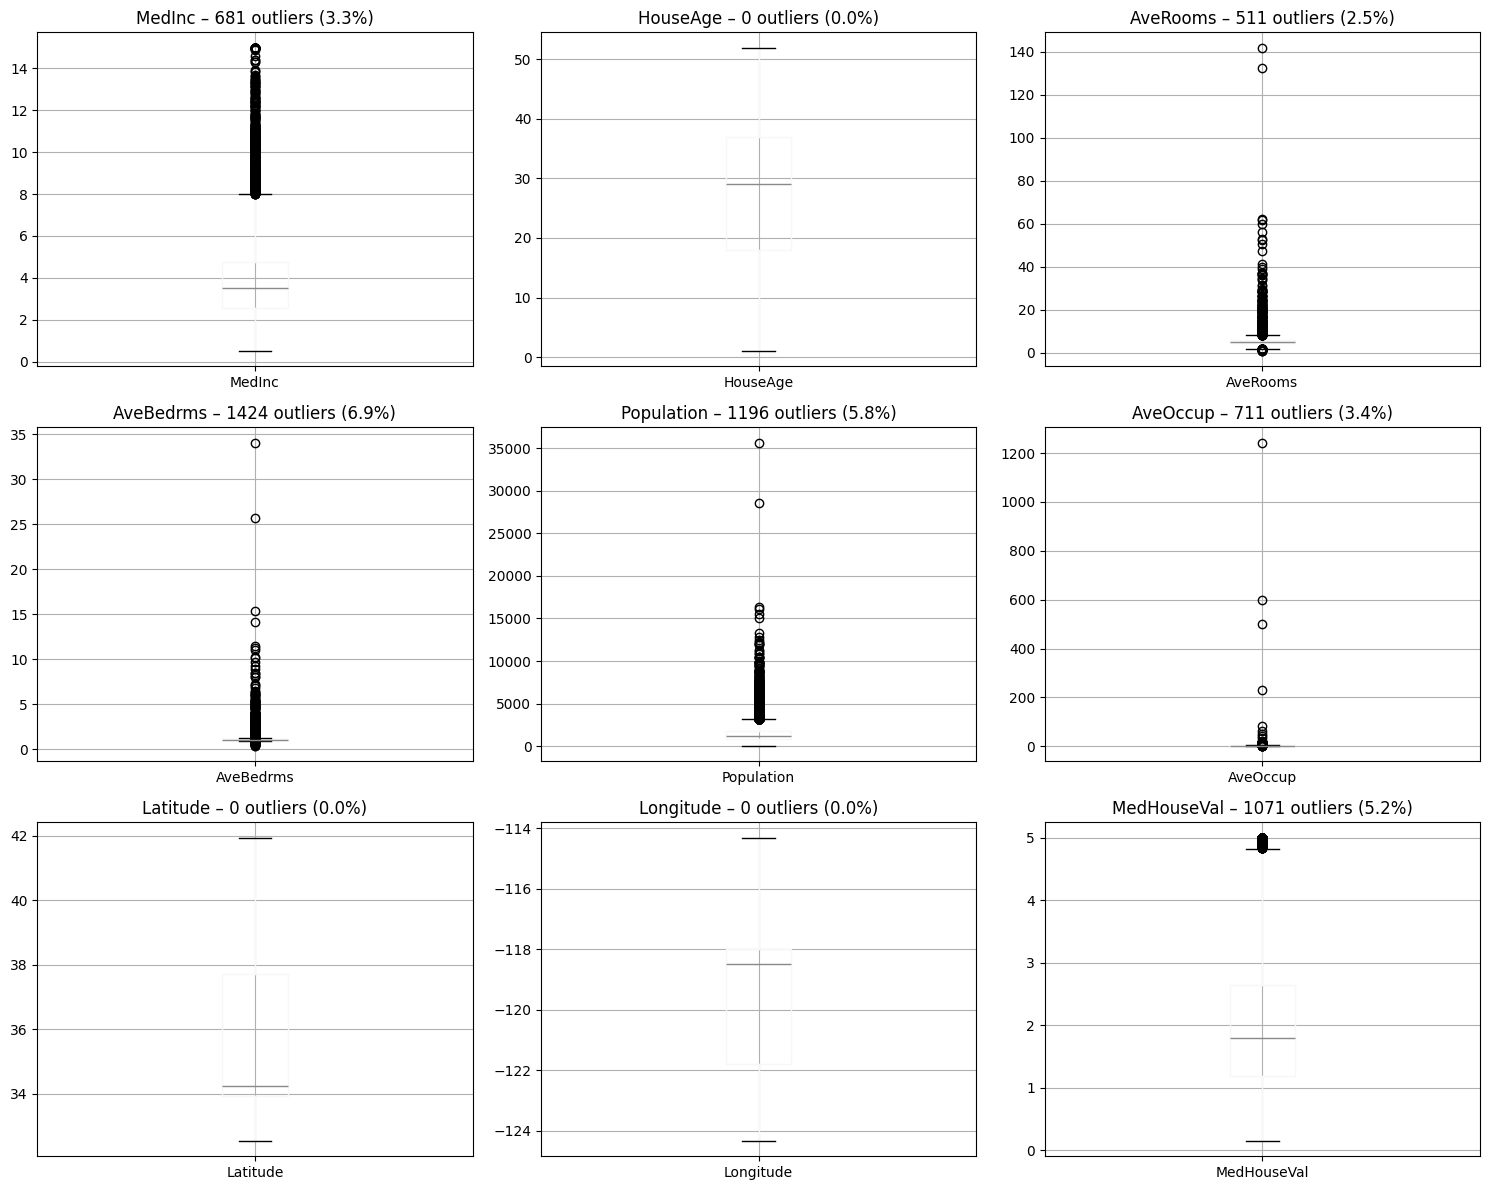


Outlier Summary:
MedInc: 681 outliers (3.3%)
HouseAge: 0 outliers (0.0%)
AveRooms: 511 outliers (2.5%)
AveBedrms: 1424 outliers (6.9%)
Population: 1196 outliers (5.8%)
AveOccup: 711 outliers (3.4%)
Latitude: 0 outliers (0.0%)
Longitude: 0 outliers (0.0%)
MedHouseVal: 1071 outliers (5.2%)

EDA completed successfully.


In [7]:
# %%
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

outlier_info = {}

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

    outlier_info[col] = {
        "count": len(outliers),
        "percentage": (len(outliers) / len(df)) * 100
    }

    ax.set_title(f"{col} – {len(outliers)} outliers ({outlier_info[col]['percentage']:.1f}%)")

plt.tight_layout()
plt.show()

print("\nOutlier Summary:")
for col, info in outlier_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.1f}%)")

print("\nEDA completed successfully.")
